The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.

Problem Statement:
Predict whether theo candidate will work for the company or not

## Import Libraries

In [882]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [883]:
df = pd.read_csv("aug_train.csv")
df.head(10) #several missing values!

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [884]:
df.shape

(19158, 14)

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [886]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [887]:
print(df.city.value_counts())
print("\n")
print(df.city_development_index.value_counts())
print("\n")
print(df.relevent_experience.value_counts())
print("\n")
print(df.enrolled_university.value_counts())
print("\n")
print(df.education_level.value_counts())
print("\n")
print(df.major_discipline.value_counts())
print("\n")
print(df.experience.value_counts())
print("\n")
print(df.company_size.value_counts())
print("\n")
print(df.last_new_job.value_counts())


city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64


Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64


Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dt

In [888]:
replaceStruct = {  "gender"             : {"Male":1,"Female":0,"NaN":np.nan},
                   "relevent_experience": {"Has relevent experience":1,"No relevent experience":2},
                   "enrolled_university": {"no_enrollment":1,"NaN":np.nan,"Full time course":2,"Part time courset":3},
                   "education_level"    : {"Graduate":1,"Masters":2,"High School":3,"Phd":4,"Primary School":5},
                   "major_discipline"   : {"STEM":1,"Humanities":2,"Others":3,"Business Degree":4,"Arts":5,"No Major":6},
                   "experience"         : {">20":21,"<1":0},
                   "company_size"       : {"<10":0,"NaN":np.nan,"10/49":1,"50-99":2,"100-500":3,"500-999":4,"1000-4999":5,"5000-9999":6,"10000+":7},
                   "last_new_job"       : {"never":0,"1":1,"2":2,"3":3,"4":4,">4":5}  
                }

In [889]:
df=df.replace(replaceStruct)

In [890]:
#dropping city and copany type as from problem statement it is irrelevant
df.drop(["city","company_type"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  int64  
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  float64
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  float64
 9   last_new_job            18735 non-null  float64
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [891]:
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')  # Eplicitely covert all feature data type to float
df['major_discipline'] = pd.to_numeric(df['major_discipline'], errors='coerce')# Eplicitely covert all feature data type to float
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df['enrolled_university'] = pd.to_numeric(df['enrolled_university'], errors='coerce')# Eplicitely covert all feature data type to float
df.dtypes

enrollee_id                 int64
city_development_index    float64
gender                    float64
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [892]:
medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis=0)

In [893]:
df.info() # data prepocessing complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  float64
 3   relevent_experience     19158 non-null  int64  
 4   enrolled_university     19158 non-null  float64
 5   education_level         19158 non-null  float64
 6   major_discipline        19158 non-null  float64
 7   experience              19158 non-null  float64
 8   company_size            19158 non-null  float64
 9   last_new_job            19158 non-null  float64
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.8 MB


### Data Visualisation

<AxesSubplot:xlabel='target', ylabel='count'>

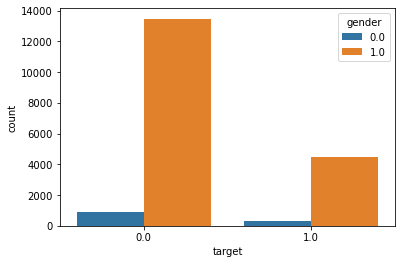

In [894]:
sns.countplot(x="target",hue="gender",data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

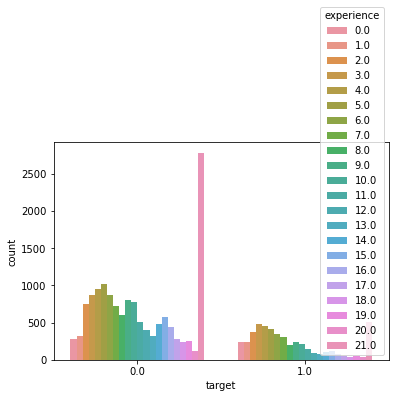

In [895]:
sns.countplot(x="target",hue="experience",data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

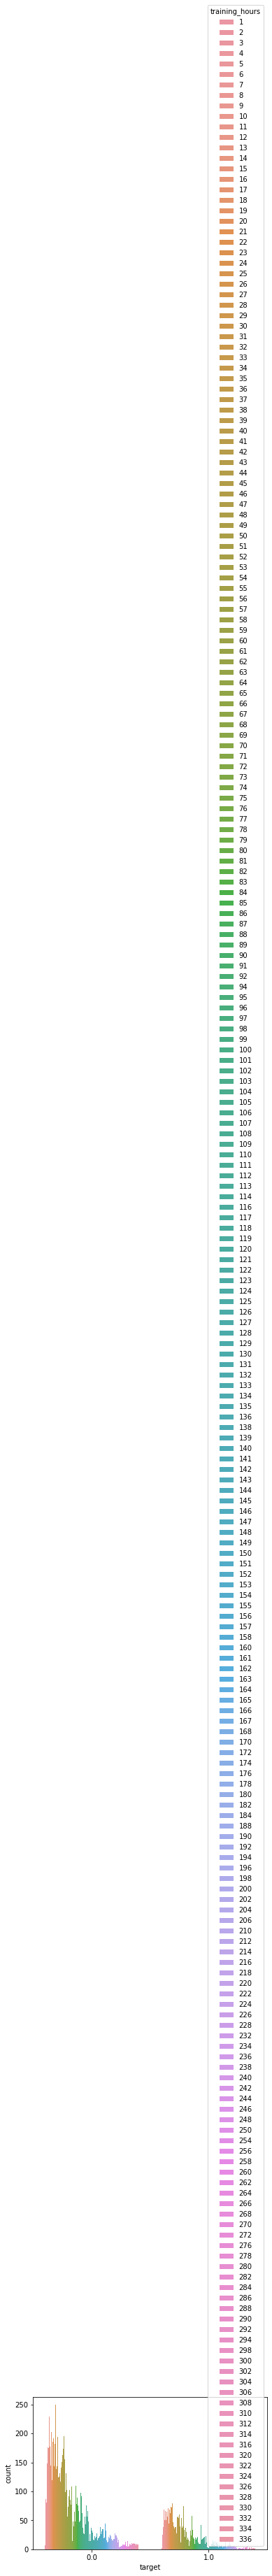

In [896]:
sns.countplot(x="target",hue="training_hours",data=df)

<AxesSubplot:xlabel='experience', ylabel='training_hours'>

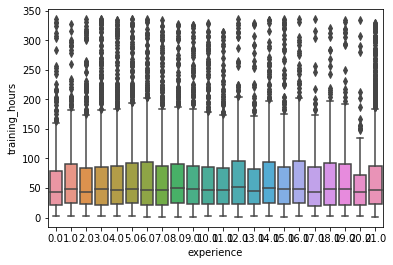

In [897]:
sns.boxplot(x="experience",y="training_hours",data=df)

### finding correlations

In [898]:
df.corr()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
enrollee_id,1.000000,-0.040455,-0.015784,0.043359,0.026291,-0.021813,0.014238,-0.035395,0.013056,-0.027580,0.000998,0.049475
city_development_index,-0.040455,1.000000,-0.033861,-0.059808,-0.161016,0.069636,0.087713,0.333368,0.073180,0.191410,0.001920,-0.341665
gender,-0.015784,-0.033861,1.000000,-0.009573,0.014319,0.017411,-0.045470,0.036601,-0.011361,0.005639,-0.001180,-0.008494
relevent_experience,0.043359,-0.059808,-0.009573,1.000000,0.369085,0.216662,0.006204,-0.339591,-0.000958,-0.247496,-0.011566,0.128430
enrolled_university,0.026291,-0.161016,0.014319,0.369085,1.000000,0.053713,-0.076961,-0.315059,-0.042154,-0.231133,-0.006863,0.150171
education_level,-0.021813,0.069636,0.017411,0.216662,0.053713,1.000000,-0.088780,-0.033836,-0.000941,-0.085971,-0.003256,-0.088760
major_discipline,0.014238,0.087713,-0.045470,0.006204,-0.076961,-0.088780,1.000000,0.023982,-0.013834,0.040953,-0.007398,-0.008336
experience,-0.035395,0.333368,0.036601,-0.339591,-0.315059,-0.033836,0.023982,1.000000,0.098577,0.478087,0.000848,-0.176465
company_size,0.013056,0.073180,-0.011361,-0.000958,-0.042154,-0.000941,-0.013834,0.098577,1.000000,0.096126,-0.012415,-0.022631
last_new_job,-0.027580,0.191410,0.005639,-0.247496,-0.231133,-0.085971,0.040953,0.478087,0.096126,1.000000,-0.004949,-0.084607


In [899]:
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

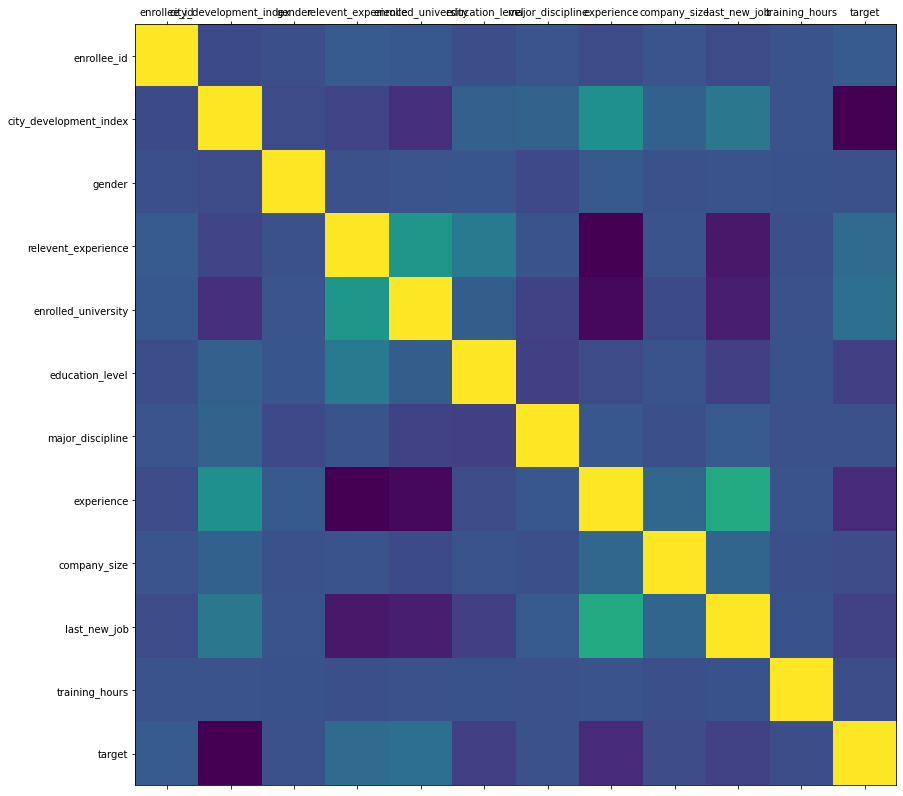

In [900]:
plot_corr(df) #Visualising correlations

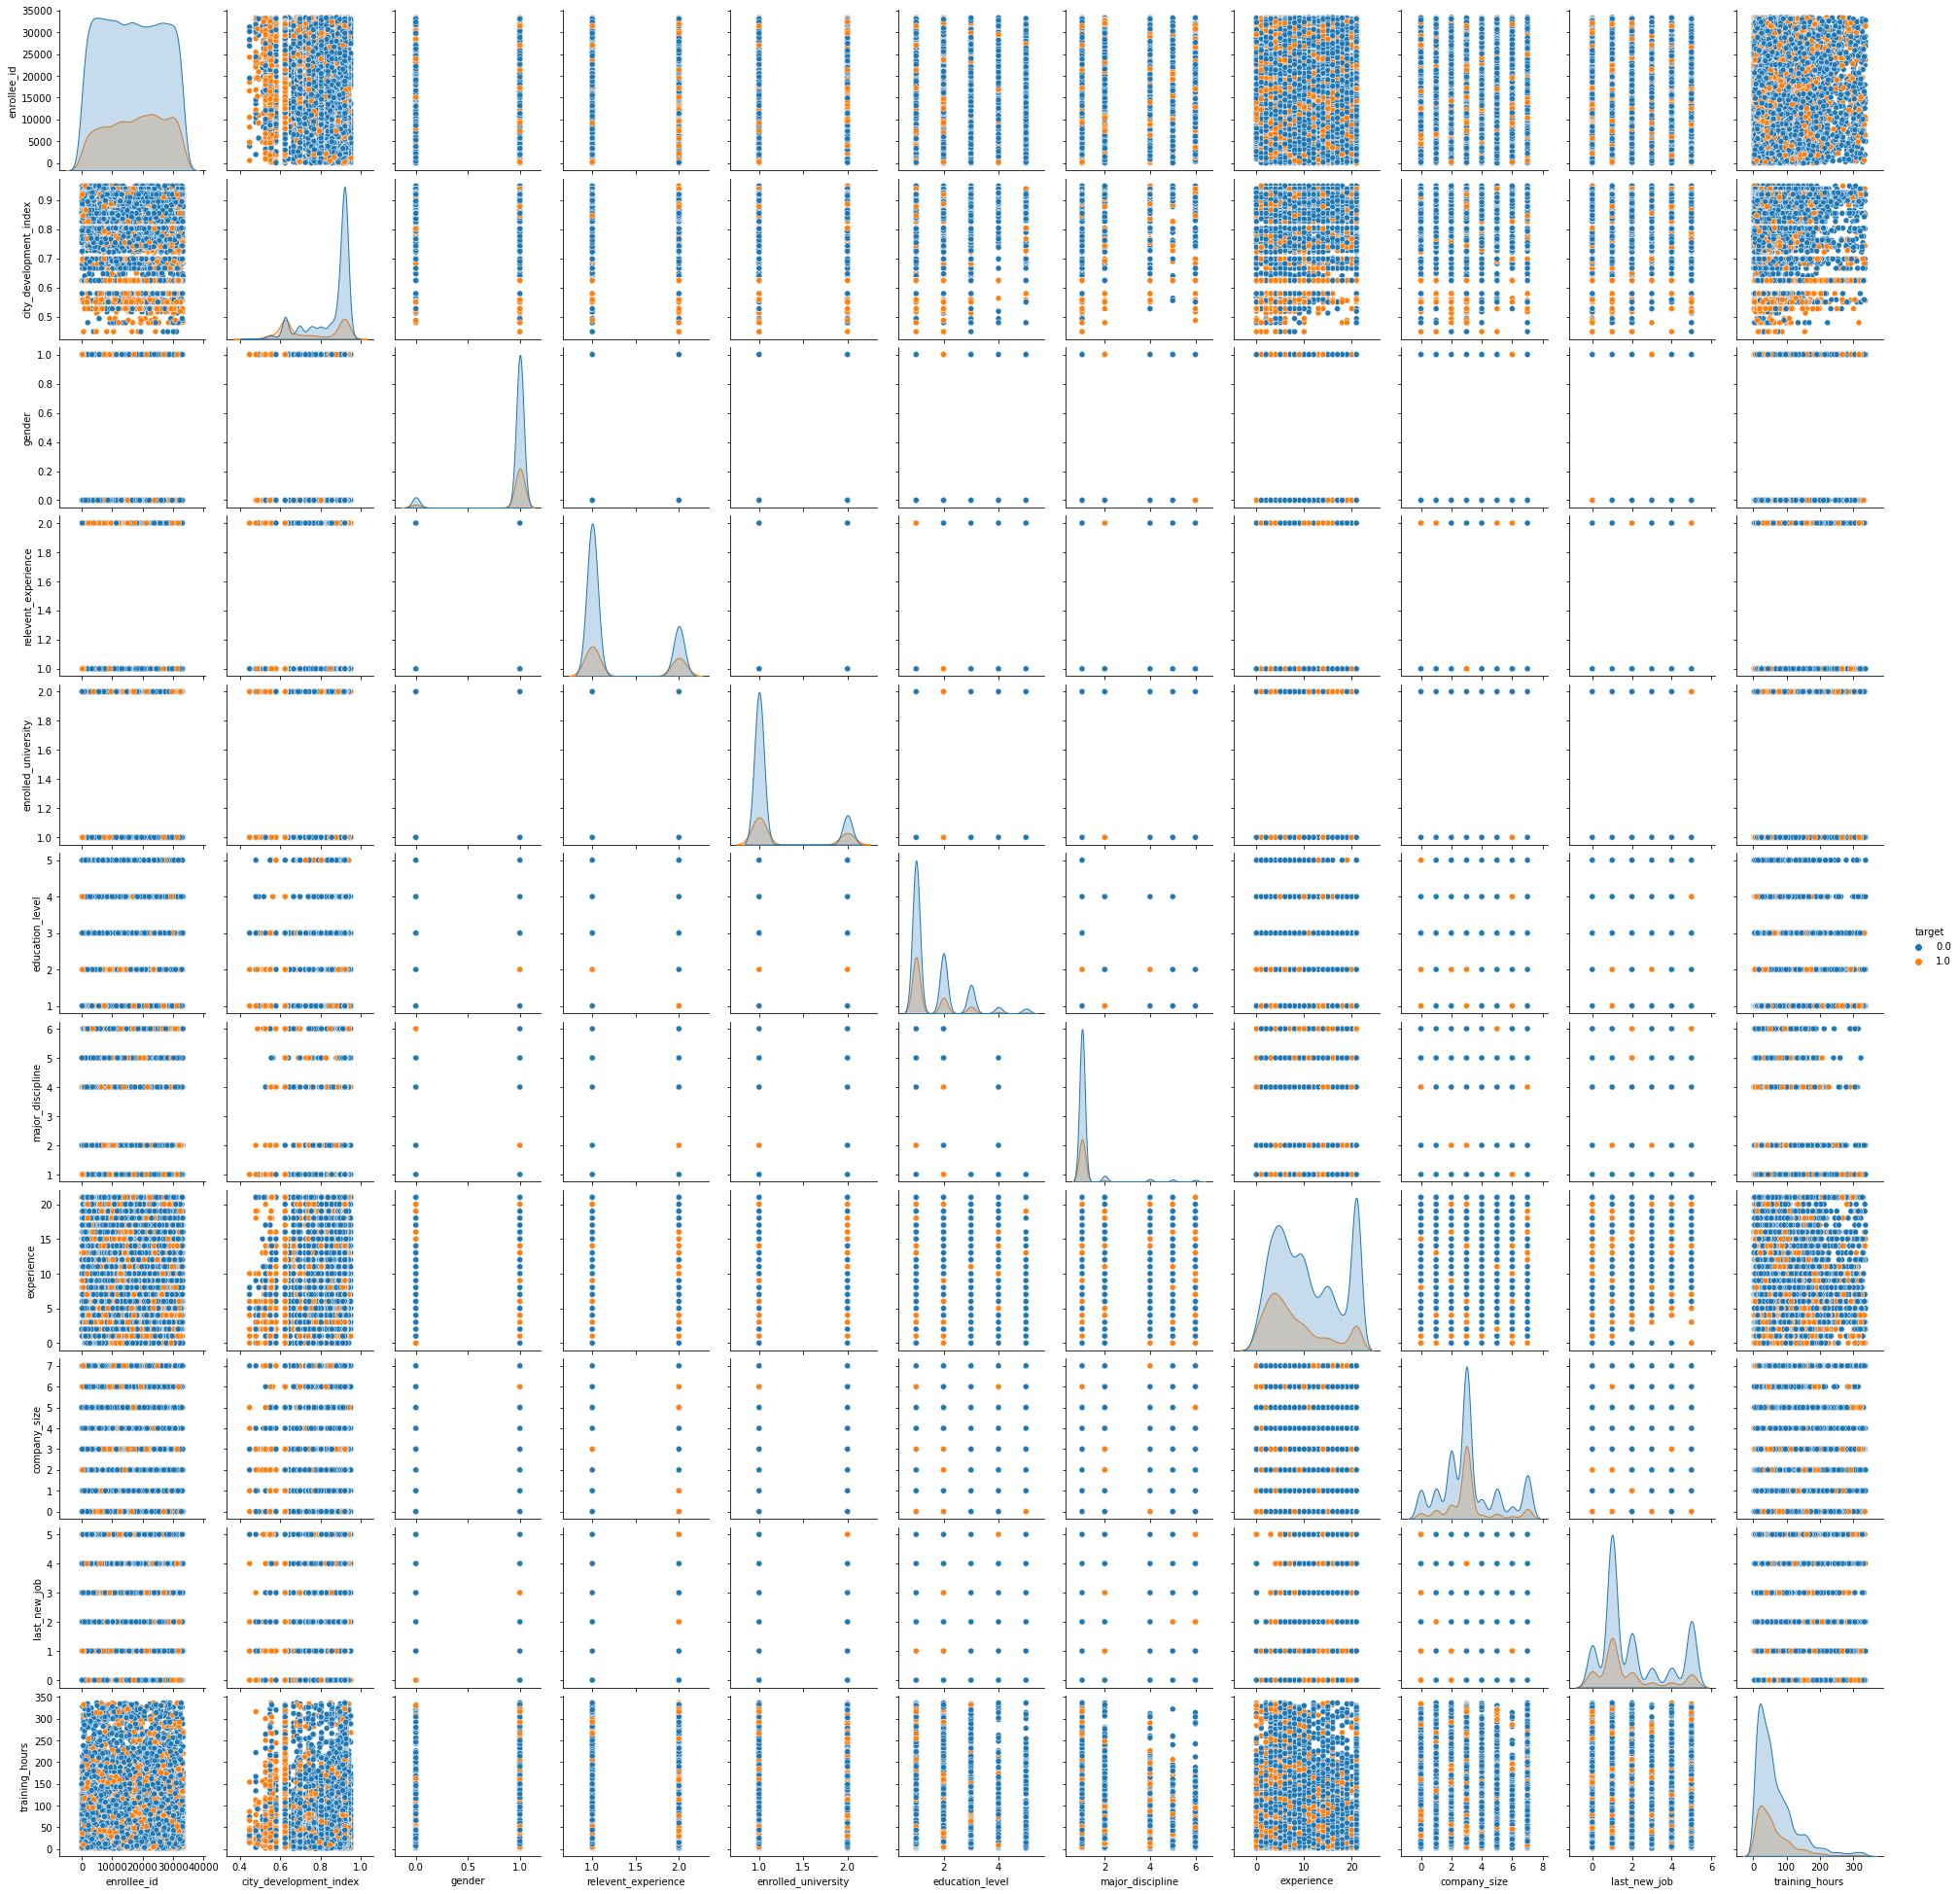

In [901]:
sns.pairplot(df,diag_kind='kde',hue='target')

### Splitting Data

In [902]:
X = df.drop("target" , axis=1)
y = df.pop("target")

In [903]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Random Forest Classifier

In [904]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=10)
rfcl = rfcl.fit(X_train, y_train)


0.9997762863534676
0.7700069589422408


<AxesSubplot:>

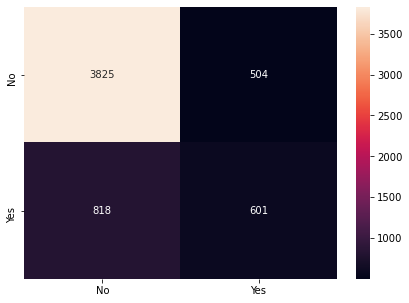

In [905]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Decision tree Classifier

In [906]:
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=4)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=4)

In [907]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.7839671886651752
0.779053583855254


0.779053583855254


<AxesSubplot:>

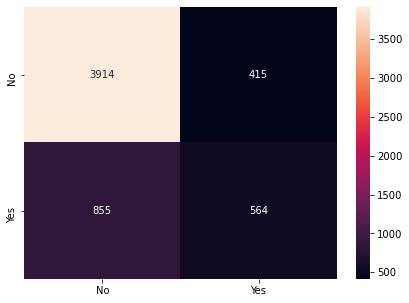

In [908]:
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
